### Import necessary libraries

In [16]:
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

C:\Users\User\AppData\Local\Temp\ipykernel_13052\555757248.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### Load dataset

In [17]:
mnist_train, mnist_val, mnist_test = tfds.load("mnist", 
        split = ["train[:80%]", "train[80%:]", "test"], 
        as_supervised=True)

print("Train set size:", tf.data.experimental.cardinality(mnist_train).numpy())
print("Validation set size:", tf.data.experimental.cardinality(mnist_val).numpy())
print("Test set size:", tf.data.experimental.cardinality(mnist_test).numpy())

Train set size: 48000
Validation set size: 12000
Test set size: 10000


We will take a look at what these images look like

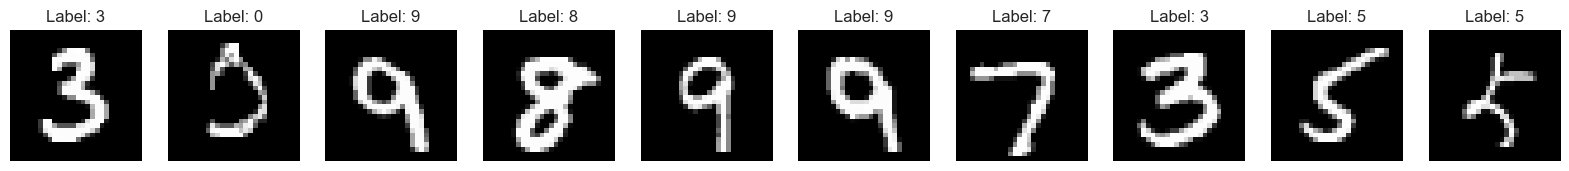

In [18]:
shuffled_train = mnist_train.shuffle(buffer_size=10000)
plt.figure(figsize=(10 * 2, 2))
for i, (image, label) in enumerate(shuffled_train.take(10)):
    plt.subplot(1, 10, i + 1)
    plt.imshow(image.numpy().squeeze(), cmap='gray')
    plt.title(f"Label: {label.numpy()}")
    plt.axis('off')
plt.show()

We check the shape of each image

In [19]:
for image, label in mnist_train.take(1):
    print("Image shape:", image.shape)

Image shape: (28, 28, 1)


Distribution of train_data

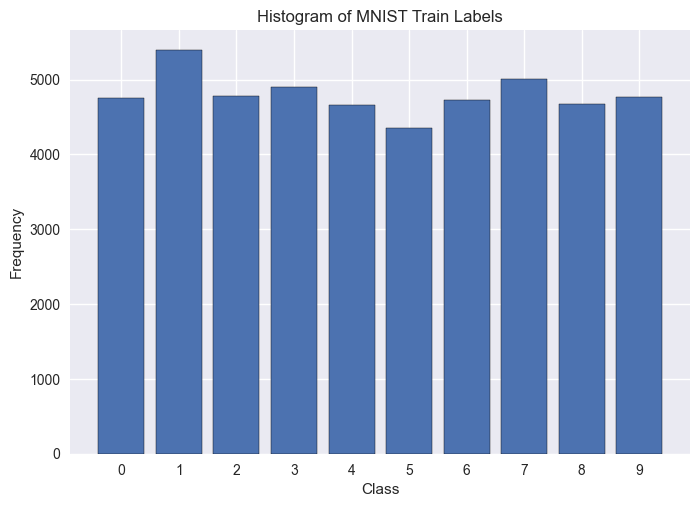

In [20]:
# Collect all labels into a list
labels = [label.numpy() for _, label in mnist_train]

# Plot histogram
plt.hist(labels, bins=np.arange(11) - 0.5, edgecolor='black', rwidth=0.8)
plt.xticks(range(10))
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Histogram of MNIST Train Labels")
plt.grid(True)
plt.show()

Distribution of val_data

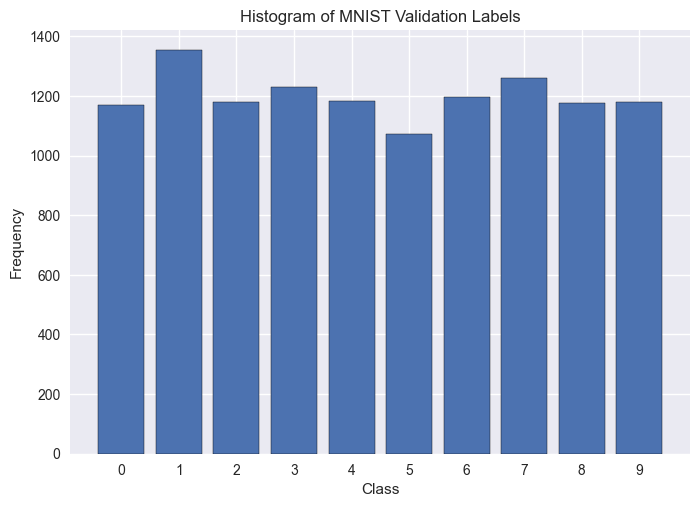

In [21]:
# Collect all labels into a list
labels = [label.numpy() for _, label in mnist_val]

# Plot histogram
plt.hist(labels, bins=np.arange(11) - 0.5, edgecolor='black', rwidth=0.8)
plt.xticks(range(10))
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Histogram of MNIST Validation Labels")
plt.grid(True)
plt.show()

Distribution of test_data

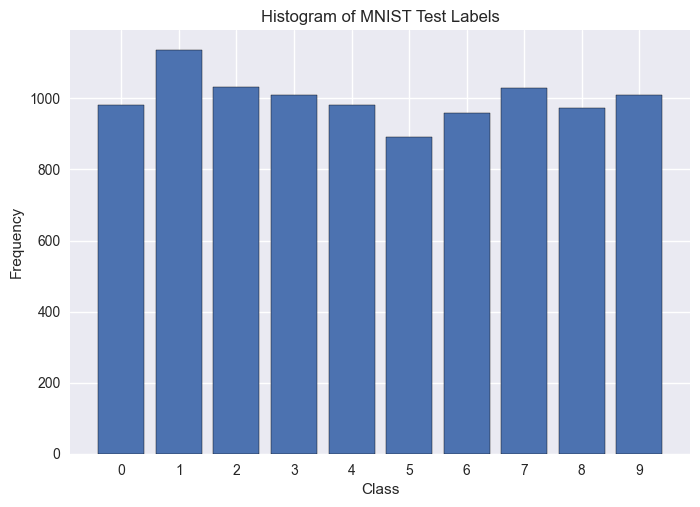

In [22]:
# Collect all labels into a list
labels = [label.numpy() for _, label in mnist_test]

# Plot histogram
plt.hist(labels, bins=np.arange(11) - 0.5, edgecolor='black', rwidth=0.8)
plt.xticks(range(10))
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Histogram of MNIST Test Labels")
plt.grid(True)
plt.show()

Batching the data

In [23]:
mnist_train = mnist_train.shuffle(1000).batch(32)
mnist_val = mnist_val.batch(32)
mnist_test = mnist_test.batch(32)

### Design network architecture

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 batch_normalization_2 (Bat  (None, 26, 26, 16)        64        
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 26, 26, 16)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv_2 (Conv2D)             (None, 11, 11, 32)        4640      
                                                                 
 batch_normalization_3 (Bat  (None, 11, 11, 32)       

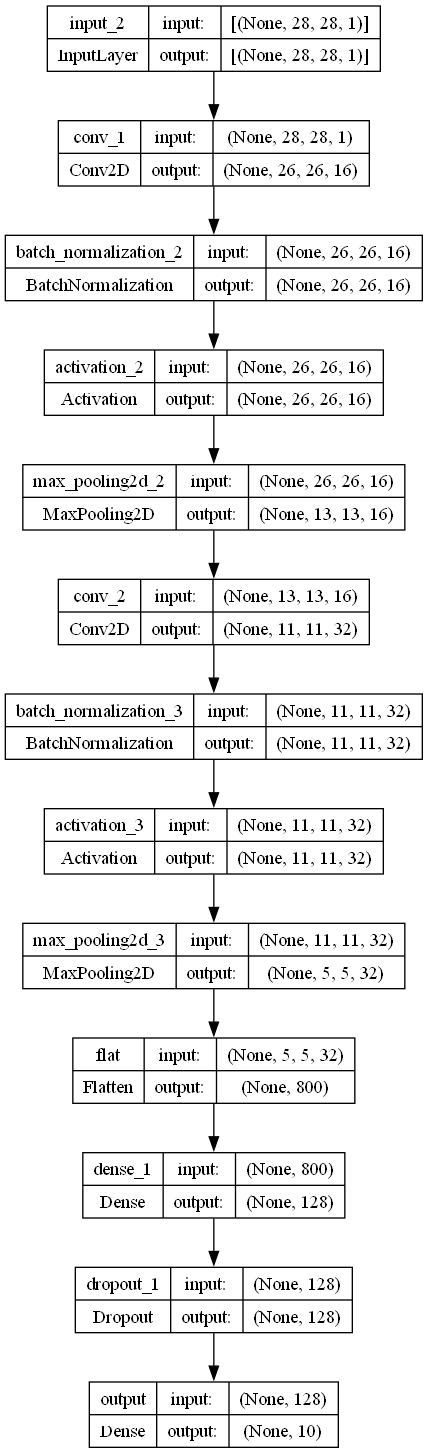

In [24]:
# Define the model
model = Sequential([
    # Input image shape (28, 28, 1)
    Input(shape=(28, 28, 1)),         

    # Convolutional layer --> (26, 26, 16) 
    Conv2D(filters=16, kernel_size=3, strides=1, name='conv_1'),
    BatchNormalization(),
    Activation('relu'),
    # Pooling layer --> (13, 13, 16)
    MaxPooling2D(pool_size=(2, 2)),                        

    # Convolutional layer --> (11, 11, 32) 
    Conv2D(filters=32, kernel_size=3, strides=1, name='conv_2'),
    BatchNormalization(),
    Activation('relu'),
    # Pooling layer --> (5, 5, 32)
    MaxPooling2D(pool_size=(2, 2)), 

    # Flatten --> (5x5x32, 1)
    Flatten(name='flat'),               
    # FullyConnected --> (128, 1)
    Dense(units=128, activation='relu', name='dense_1'),    
    Dropout(0.3),
    # FullyConnected --> (10, 1)
    Dense(units=10, activation='softmax', name='output')     
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Show model architecture
plot_model(
    model, 
    to_file='model_architecture.png', 
    show_shapes=True, 
    show_layer_names=True
)

### Train model

In [25]:
# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the data
history = model.fit(
    mnist_train,
    epochs=10,
    validation_data=mnist_val,
    callbacks=[early_stop]
)

Epoch 1/10
1500/1500 [==============================] - 36s 22ms/step - loss: 0.1820 - accuracy: 0.9441 - val_loss: 0.0676 - val_accuracy: 0.9791
Epoch 2/10
1500/1500 [==============================] - 32s 22ms/step - loss: 0.0747 - accuracy: 0.9768 - val_loss: 0.0450 - val_accuracy: 0.9857
Epoch 3/10
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0574 - accuracy: 0.9829 - val_loss: 0.0484 - val_accuracy: 0.9852
Epoch 4/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0471 - accuracy: 0.9854 - val_loss: 0.0379 - val_accuracy: 0.9878
Epoch 5/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0390 - accuracy: 0.9884 - val_loss: 0.0321 - val_accuracy: 0.9904
Epoch 6/10
1500/1500 [==============================] - 37s 24ms/step - loss: 0.0345 - accuracy: 0.9890 - val_loss: 0.0413 - val_accuracy: 0.9887
Epoch 7/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0304 - accuracy: 0.9900 - val_loss: 0.0390 -

We see the Learning Curve

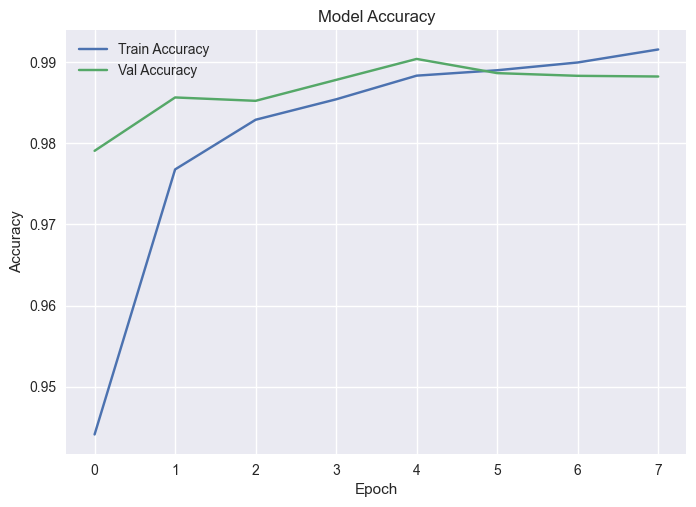

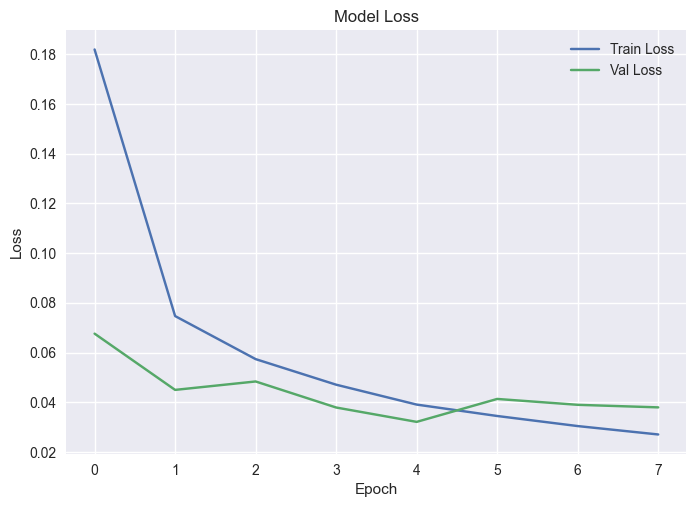

In [26]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Evaluate model

In [27]:
test_loss, test_acc = model.evaluate(mnist_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 [==============================] - 3s 9ms/step - loss: 0.0275 - accuracy: 0.9913
Test accuracy: 0.9913


Confusion matrix

In [28]:
# Initialize lists to hold true and predicted labels
y_true = []
y_pred = []

# Iterate through the test dataset
for image, label in mnist_test:
    y_true.extend(label.numpy())  # True labels
    predictions = model.predict(image, verbose=False)  # Predict the class probabilities
    y_pred.extend(np.argmax(predictions, axis=1))  # Get predicted class (index with max prob)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

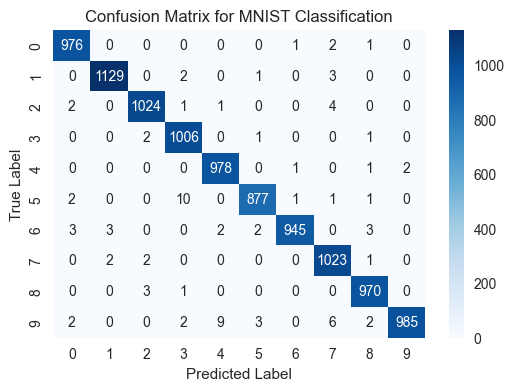

In [29]:
# Create confusion matrix
cm = tf.math.confusion_matrix(y_true, y_pred, num_classes=10).numpy()

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))

# Add titles and labels
plt.title("Confusion Matrix for MNIST Classification")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Show plot
plt.show()